In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
cd 'drive/My Drive/Siamese/Identification'

/content/drive/My Drive/Siamese/Identification


In [3]:
import sys
sys.path.insert(0, '..')
sys.path.insert(0, '../Data')
sys.path.insert(0, '../Encoder')

In [4]:
!pip install torchaudio

     |████████████████████████████████| 6.7MB 4.5MB/s 


In [5]:
import os
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim

from tqdm import tqdm

In [6]:
DATASET_PATH = '/content/drive/My Drive/DataSet'
EPOCH_NUM = 10

torch.backends.cudnn.deterministic = True

NUM_WORKERS = 4

In [7]:
from IdentificationDataset import IdentificationDataset
from IdentificationDataset import ReturnType
from torchvision.transforms import Compose

from Normalize import Normalize
from ToTensor import ToTensor

DATASET_PATH = '/content/drive/My Drive/DataSet'

transforms = Compose([
    Normalize(),
    ToTensor()
])

NUM_CLASSES = 20

trainset = IdentificationDataset(DATASET_PATH, 
                                 NUM_CLASSES,
                                 encode=False,
                                 train=True, 
                                 transform=transforms,
                                 lenght=3,
                                 return_type=ReturnType.STANDARD)
trainsetloader = torch.utils.data.DataLoader(trainset, 
                                             batch_size=1, 
                                             num_workers=NUM_WORKERS, 
                                             shuffle=True)

testset = IdentificationDataset(DATASET_PATH, 
                                NUM_CLASSES,
                                encode=False,
                                train=False, 
                                transform=transforms,
                                lenght=3,
                                return_type=ReturnType.STANDARD)

testsetloader = torch.utils.data.DataLoader(testset, 
                                            batch_size=1, 
                                            num_workers=NUM_WORKERS)

print("lenght test loader ", len(testsetloader))


sample lenght  3
sample lenght  3
lenght test loader  258


In [8]:
from Conference import Conference

# Define default device, we should use the GPU (cuda) if available
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net = Conference(DEVICE, time=False)
net.to(DEVICE)

Conference(
  (encoder): TransFourier(
    (spectrogram): Spectrogram()
    (amp): AmplitudeToDB()
    (block1): Conv2DBlock(
      (conv1): Conv2d(1, 32, kernel_size=(1, 1), stride=(2, 1))
      (conv2): Conv2d(1, 96, kernel_size=(7, 7), stride=(2, 1), padding=(3, 3))
      (bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
      (maxpool): MaxPool2d(kernel_size=(4, 4), stride=(4, 4), padding=0, dilation=1, ceil_mode=False)
    )
    (block2): Conv2DBlock(
      (conv1): Conv2d(128, 64, kernel_size=(1, 1), stride=(2, 1))
      (conv2): Conv2d(128, 192, kernel_size=(5, 5), stride=(2, 1), padding=(2, 2))
      (bn): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
      (maxpool): MaxPool2d(kernel_size=(4, 2), stride=(4, 2), padding=0, dilation=1, ceil_mode=False)
    )
    (block3): Conv2DBlock(
      (conv1): Conv2d(256, 64, kernel_size=(1, 1), stride=(2, 1))
      (conv2): Co

In [9]:
with torch.no_grad():
  # test
  net.eval()
  # Store the places
  speakers_list = testset.get_speakers_list(15)
  net.load_encoder()
  net.initspeakers(speakers_list)  
  net.initplaces(speakers_list, maxsize=3)

Encoder loaded


*** Epoch  0  ***
*** Train ***


1876it [04:05,  7.64it/s]

accuracy mean  0.3779317697228145 topk 0.5970149253731343  min  0.5836886993603412
Error  0.40298507462686567
{270: 33, 272: 71, 273: 26, 274: 97, 275: 39, 276: 31, 277: 88, 278: 9, 271: 18, 279: 98, 280: 50, 281: 61, 282: 55, 283: 47, 285: 81, 284: 18, 286: 10, 287: 78, 288: 50, 289: 24}
*** Test ***



258it [00:21, 12.01it/s]


accuracy final_mean  0.8837209302325582  final_min  0.875968992248062


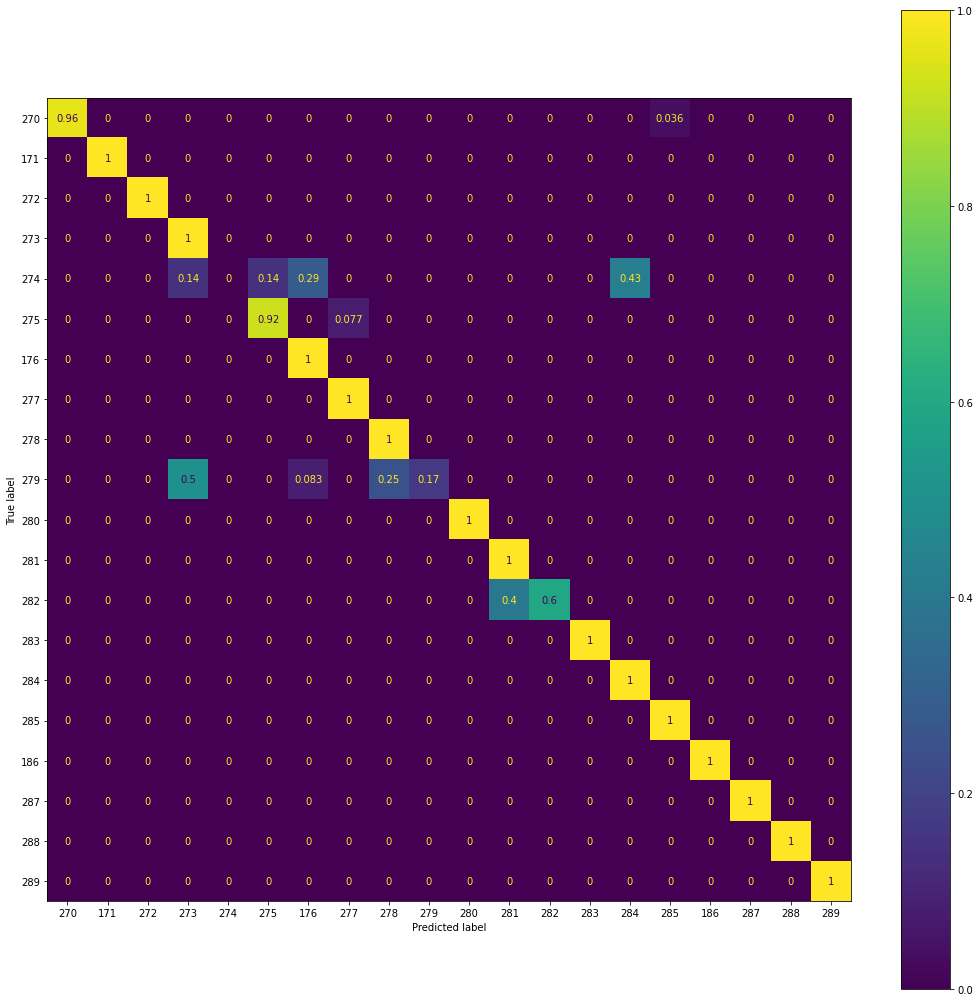

*** Epoch  1  ***
*** Train ***


1876it [00:29, 62.78it/s]

accuracy mean  0.6295309168443497 topk 0.6780383795309168  min  0.656183368869936
Error  0.32196162046908317
{270: 24, 272: 41, 273: 25, 274: 35, 275: 29, 276: 28, 277: 87, 278: 12, 271: 14, 279: 33, 280: 51, 281: 66, 282: 13, 283: 46, 285: 64, 284: 9, 286: 12, 287: 57, 288: 36, 289: 28}
*** Test ***



258it [00:03, 80.21it/s]


accuracy final_mean  0.9341085271317829  final_min  0.9263565891472868


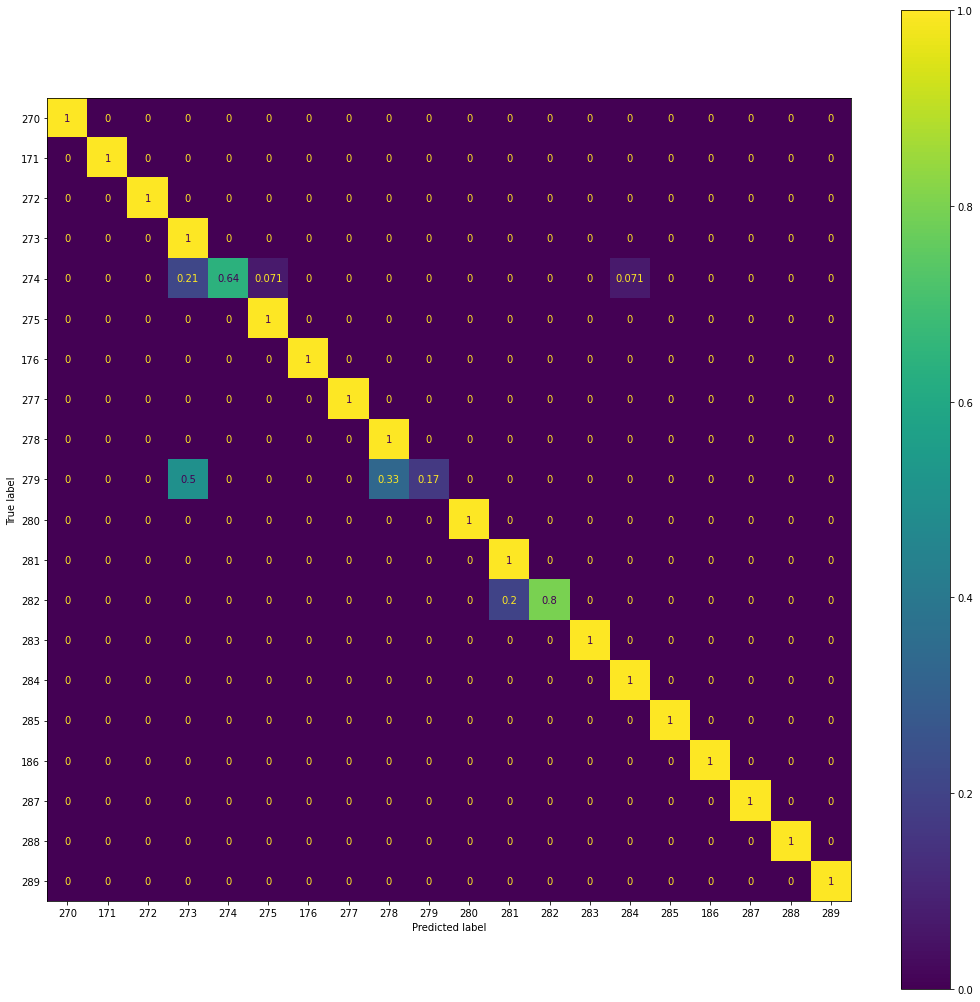

*** Epoch  2  ***
*** Train ***


1876it [00:29, 63.02it/s]

accuracy mean  0.6439232409381663 topk 0.6657782515991472  min  0.6449893390191898
Error  0.3342217484008529
{270: 26, 272: 35, 273: 31, 274: 10, 275: 27, 276: 29, 277: 88, 278: 13, 271: 22, 279: 9, 280: 53, 281: 66, 282: 12, 283: 56, 285: 64, 284: 20, 286: 8, 287: 52, 288: 41, 289: 27}
*** Test ***



258it [00:03, 77.96it/s]


accuracy final_mean  0.9457364341085271  final_min  0.9534883720930233


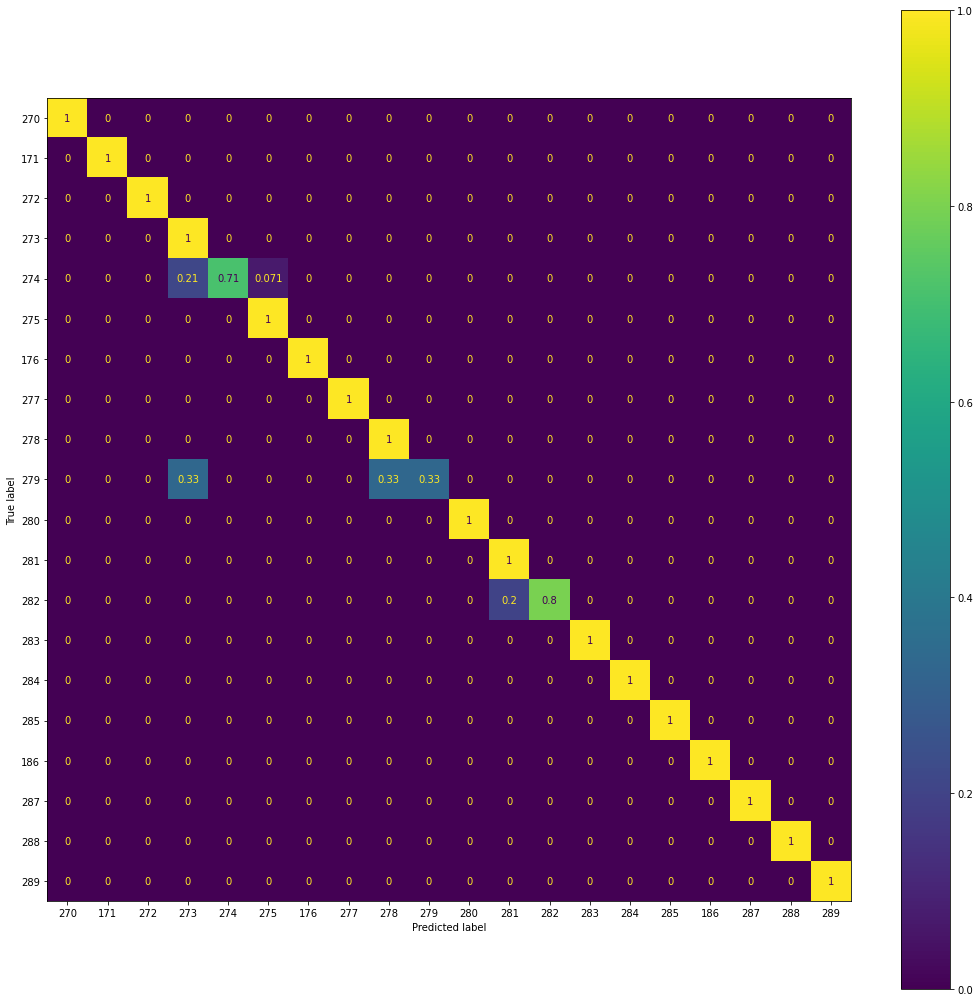

*** Epoch  3  ***
*** Train ***


1876it [00:29, 62.67it/s]

accuracy mean  0.6449893390191898 topk 0.6668443496801706  min  0.6407249466950959
Error  0.3331556503198294
{270: 23, 272: 38, 273: 31, 274: 5, 275: 24, 276: 33, 277: 90, 278: 14, 271: 22, 279: 9, 280: 48, 281: 71, 282: 12, 283: 56, 285: 61, 284: 16, 286: 8, 287: 50, 288: 36, 289: 27}
*** Test ***



258it [00:03, 80.50it/s]


accuracy final_mean  0.9496124031007752  final_min  0.9534883720930233


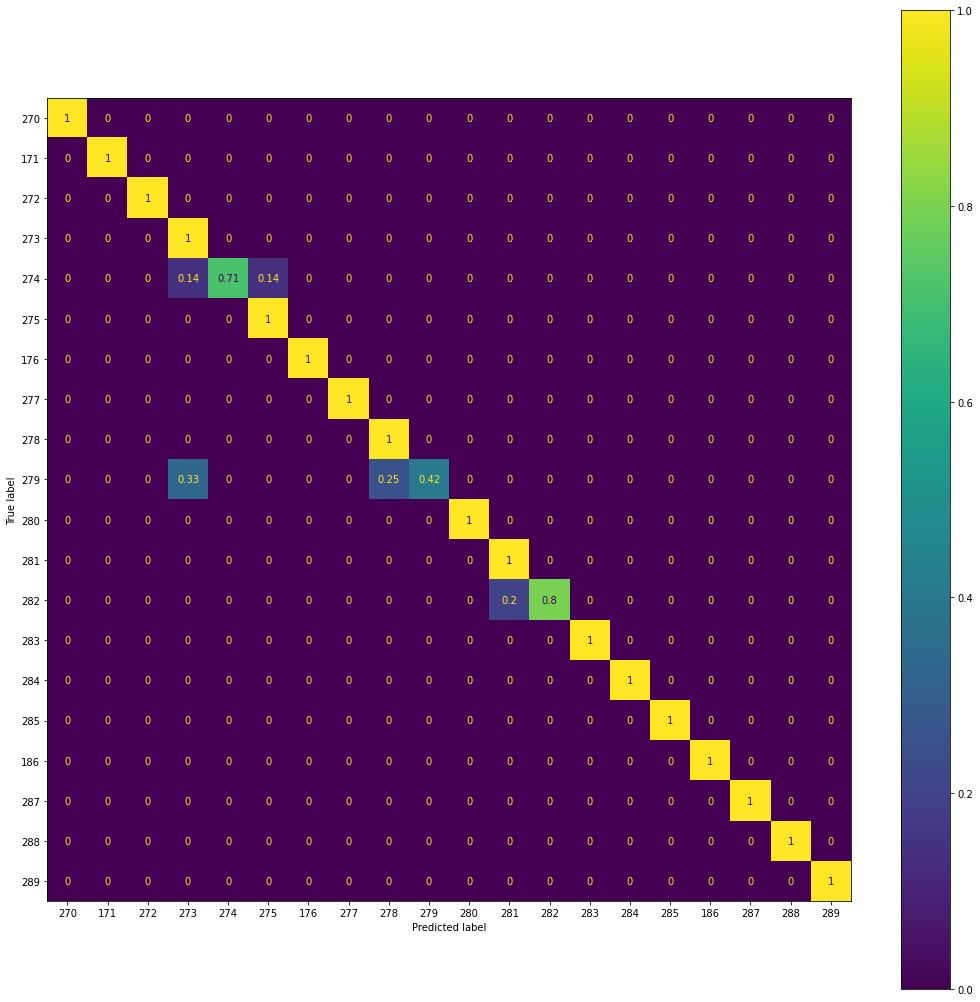

*** Epoch  4  ***
*** Train ***


1876it [00:29, 63.53it/s]

accuracy mean  0.6540511727078892 topk 0.670042643923241  min  0.6519189765458422
Error  0.3299573560767591
{270: 23, 272: 38, 273: 32, 274: 7, 275: 21, 276: 28, 277: 85, 278: 11, 271: 16, 279: 7, 280: 44, 281: 77, 282: 13, 283: 60, 285: 59, 284: 13, 286: 9, 287: 52, 288: 41, 289: 31}
*** Test ***



258it [00:03, 80.47it/s]


accuracy final_mean  0.9457364341085271  final_min  0.9534883720930233


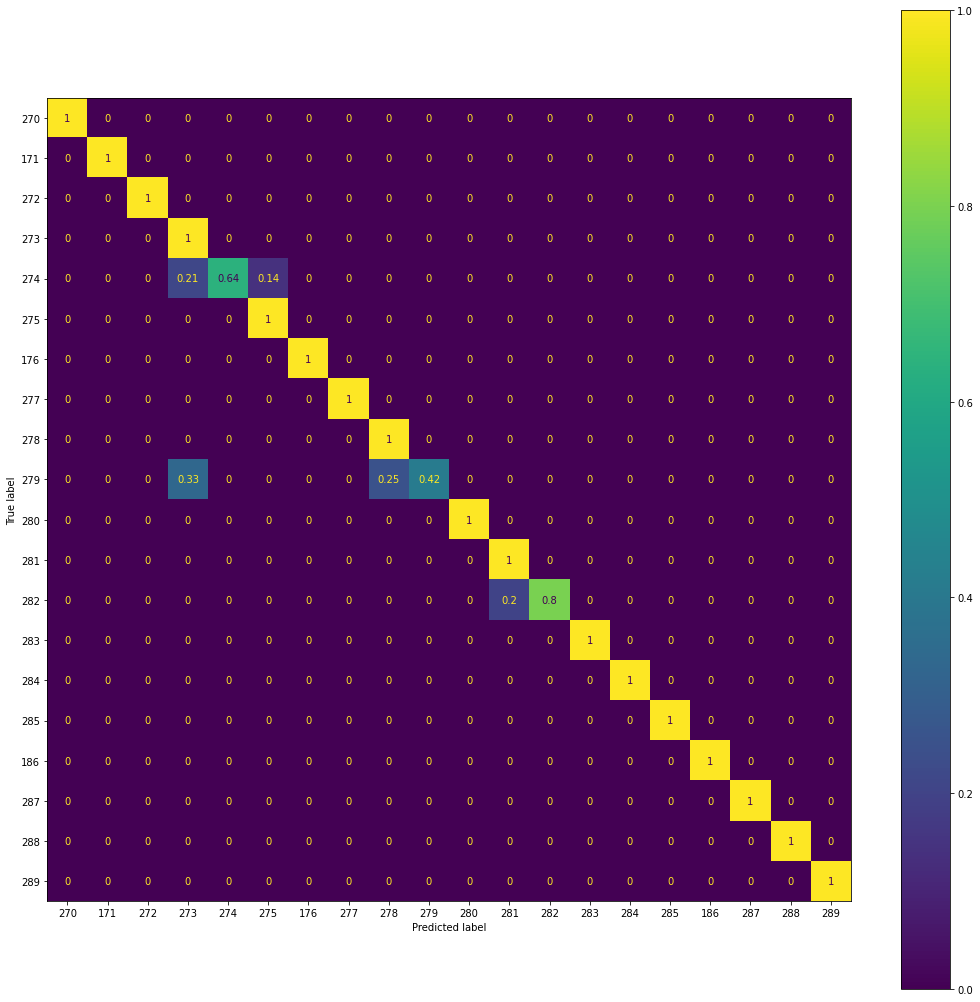

*** Epoch  5  ***
*** Train ***


1876it [00:29, 63.79it/s]

accuracy mean  0.6471215351812367 topk 0.6743070362473348  min  0.6492537313432836
Error  0.32569296375266527
{270: 25, 272: 46, 273: 30, 274: 10, 275: 27, 276: 30, 277: 68, 278: 12, 271: 16, 279: 5, 280: 50, 281: 77, 282: 12, 283: 58, 285: 58, 284: 13, 286: 9, 287: 52, 288: 41, 289: 24}
*** Test ***



258it [00:03, 80.34it/s]


accuracy final_mean  0.9457364341085271  final_min  0.9534883720930233


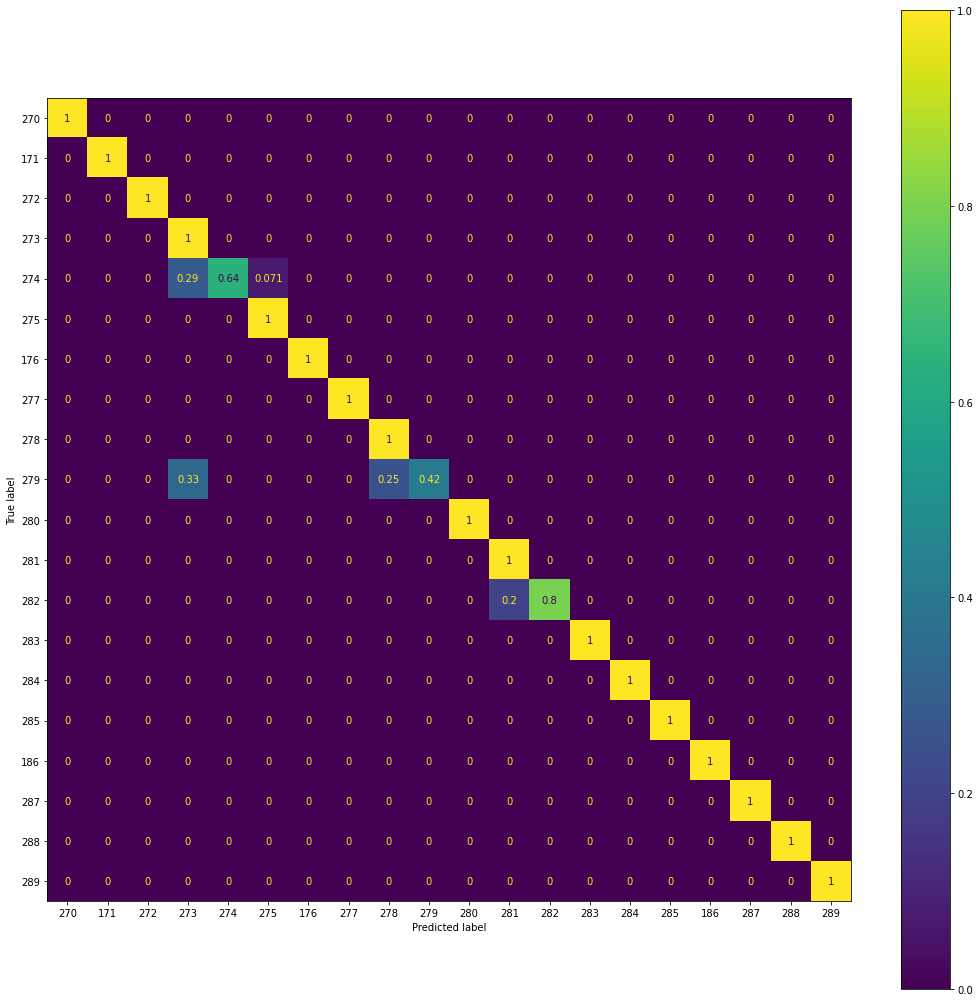

*** Epoch  6  ***
*** Train ***


1876it [00:30, 61.91it/s]

accuracy mean  0.6401918976545842 topk 0.6721748400852878  min  0.6556503198294243
Error  0.32782515991471217
{270: 23, 272: 43, 273: 34, 274: 7, 275: 24, 276: 30, 277: 70, 278: 16, 271: 16, 279: 9, 280: 46, 281: 74, 282: 13, 283: 52, 285: 58, 284: 13, 286: 12, 287: 50, 288: 36, 289: 35}
*** Test ***



258it [00:03, 80.19it/s]


accuracy final_mean  0.9457364341085271  final_min  0.9263565891472868


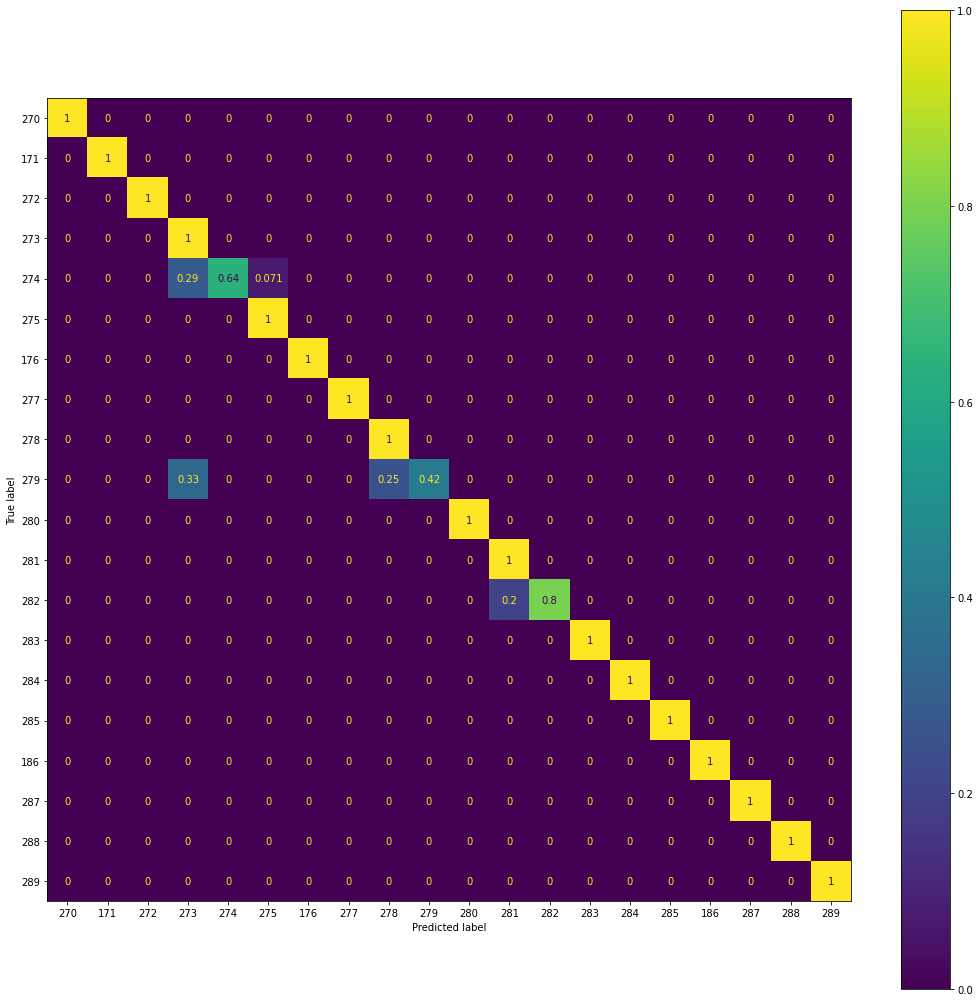

*** Epoch  7  ***
*** Train ***


1876it [00:29, 63.08it/s]

accuracy mean  0.6433901918976546 topk 0.6775053304904051  min  0.6593816631130064
Error  0.3224946695095949
{270: 23, 272: 41, 273: 30, 274: 7, 275: 22, 276: 35, 277: 66, 278: 19, 271: 14, 279: 11, 280: 38, 281: 71, 282: 13, 283: 51, 285: 58, 284: 16, 286: 10, 287: 50, 288: 47, 289: 28}
*** Test ***



258it [00:03, 79.49it/s]


accuracy final_mean  0.937984496124031  final_min  0.9224806201550387


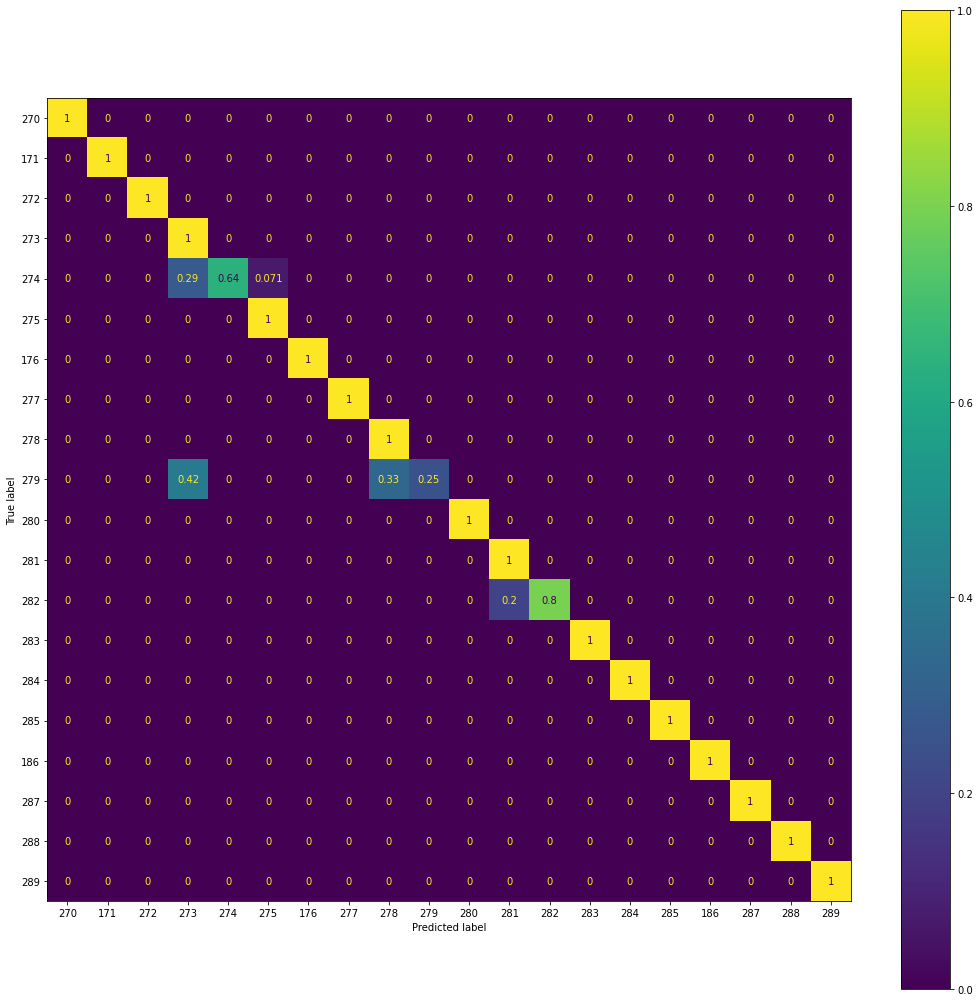

*** Epoch  8  ***
*** Train ***


1876it [00:29, 63.49it/s]

accuracy mean  0.6364605543710021 topk 0.6791044776119403  min  0.646588486140725
Error  0.3208955223880597
{270: 26, 272: 35, 273: 34, 274: 10, 275: 29, 276: 25, 277: 66, 278: 14, 271: 14, 279: 9, 280: 53, 281: 71, 282: 10, 283: 54, 285: 60, 284: 16, 286: 6, 287: 50, 288: 27, 289: 31}
*** Test ***



258it [00:03, 79.01it/s]


accuracy final_mean  0.9302325581395349  final_min  0.9186046511627907


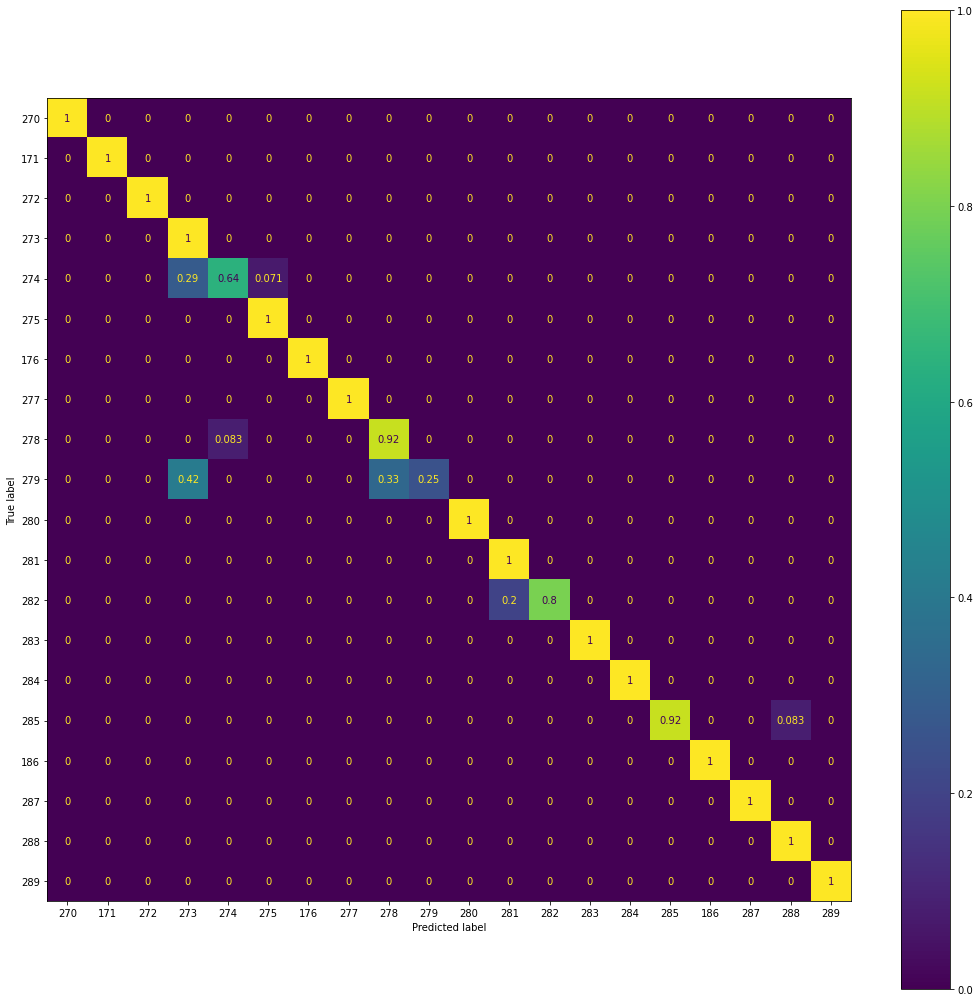

*** Epoch  9  ***
*** Train ***


1876it [00:29, 63.57it/s]

accuracy mean  0.6428571428571429 topk 0.6833688699360341  min  0.6695095948827292
Error  0.31663113006396587
{270: 23, 272: 38, 273: 33, 274: 12, 275: 29, 276: 27, 277: 64, 278: 16, 271: 16, 279: 7, 280: 57, 281: 73, 282: 12, 283: 48, 285: 65, 284: 8, 286: 7, 287: 50, 288: 36, 289: 30}
*** Test ***



258it [00:03, 79.24it/s]


accuracy final_mean  0.9302325581395349  final_min  0.9186046511627907


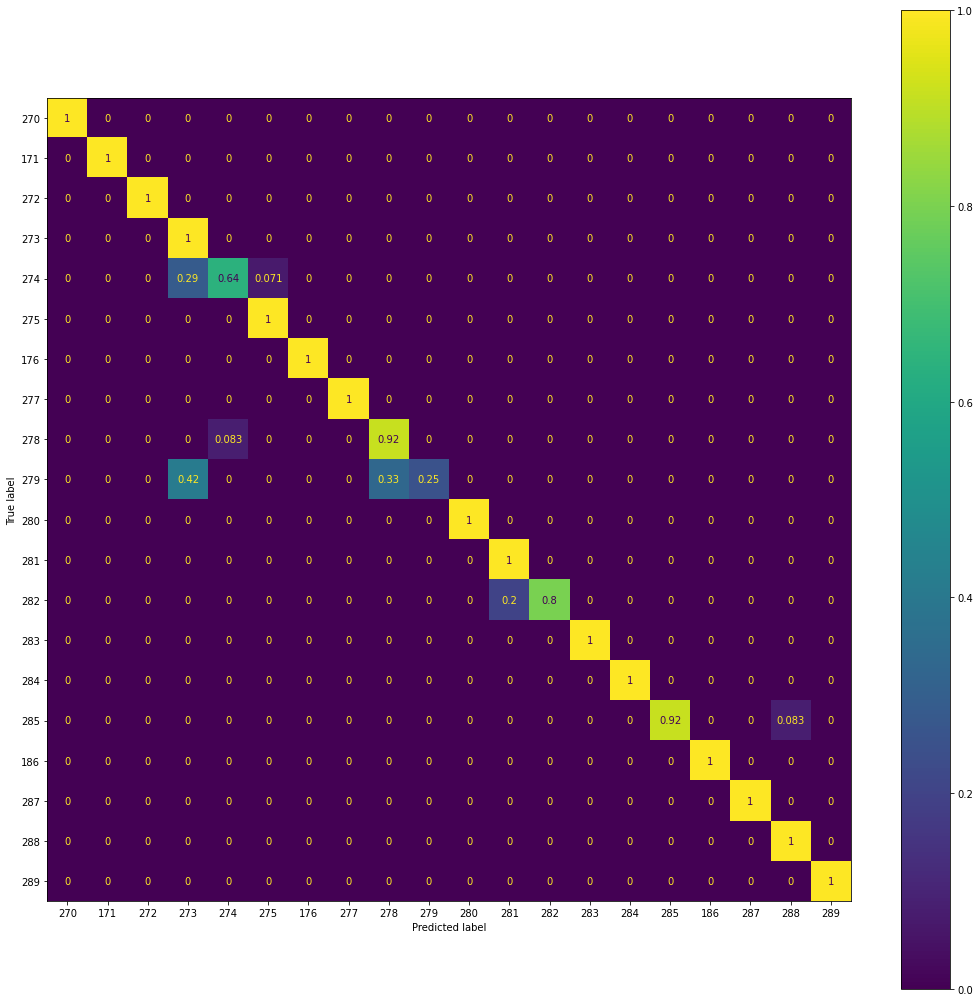

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

dict_error = {}
dict_nb = {}

conf_gold_label = None
conf_pred_label = None

with torch.no_grad():
  best_accuracy = 0
  mean_accuracies = []
  topk_accuracies = []
  min_accuracies = []
  final_mean_accuracies = []
  final_min_accuracies = []
  # Confusion matrix
  conf_gold_label = []
  conf_pred_label = []

  for epoch_num in range(EPOCH_NUM):
    print("*** Epoch ", epoch_num, " ***")
    # train
    print("*** Train ***")
    mean_accuracy = 0
    topk_accuracy = 0
    min_accuracy = 0
    nb_test = 0

    for speaker in speakers_list:
      id = speaker[0]
      dict_error[id] = 0
      dict_nb[id] = 0

    for iter_num, (gold_label, sample) in tqdm(enumerate(trainsetloader)):
      gold_label = gold_label.item()
      # Election day the network need to have the saple and the gold label
      mean_label, topk_label, min_label = net(sample, gold_label)

      nb_test += 1
      dict_nb[gold_label] += 1

      if gold_label == mean_label:
        mean_accuracy += 1
      if gold_label == topk_label:
        topk_accuracy += 1
      else:
        dict_error[gold_label] += 1
      if gold_label == min_label:
        min_accuracy += 1

    mean_accuracy /= nb_test
    topk_accuracy /= nb_test
    min_accuracy /= nb_test
    mean_accuracies.append(mean_accuracy)
    topk_accuracies.append(topk_accuracy)
    min_accuracies.append(min_accuracy)
    print("accuracy mean ", mean_accuracy, "topk", topk_accuracy, 
          " min ", min_accuracy)
    add = 0
    nb = 0
    for id in dict_error:
      add += dict_error[id]
      nb += dict_nb[id]
      dict_error[id] =  100 * dict_error[id]//dict_nb[id] 
    print("Error ", add/nb)
    print(dict_error)
    
    # test
    print("*** Test ***")
    final_mean_accuracy = 0
    final_min_accuracy = 0
    nb_test = 0
    conf_gold_label.clear()
    conf_pred_label.clear()

    for iter_num, (gold_label, sample) in tqdm(enumerate(testsetloader)):
      gold_label = gold_label.item()
      # Speaker identification network need to have the sample and the place
      final_mean_label, final_min_label = net(sample, place_id=gold_label)
      conf_gold_label.append(gold_label)
      conf_pred_label.append(final_mean_label)      
      nb_test += 1
      dict_nb[gold_label] += 1

      if gold_label == final_mean_label:
        final_mean_accuracy += 1
      if gold_label == final_min_label:
        final_min_accuracy += 1

    final_mean_accuracy /= nb_test
    final_min_accuracy /= nb_test
    final_mean_accuracies.append(final_mean_accuracy)
    final_min_accuracies.append(final_min_accuracy)
    print("accuracy final_mean ", final_mean_accuracy, 
          " final_min ", final_min_accuracy)

    cm = confusion_matrix(conf_gold_label, conf_pred_label, normalize='true')
    fig, ax = plt.subplots(figsize=(18, 18))
    disp = ConfusionMatrixDisplay(cm, [270, 171, 272, 273, 274, 275, 176, 277, 278, 279, 280, 281, 282, 283, 284, 285, 186, 287, 288, 289]).plot(ax=ax)
    plt.show()


In [11]:
print("maximum of min", round(np.max(min_accuracies), 3))
print("maximum of topk", round(np.max(topk_accuracies), 3))
print("maximum of mean", round(np.max(mean_accuracies), 3))
print("maximum of final mean", round(np.max(final_mean_accuracies), 3))
print("maximum of final min", round(np.max(final_mean_accuracies), 3))

maximum of min 0.67
maximum of topk 0.683
maximum of mean 0.654
maximum of final mean 0.95
maximum of final min 0.95


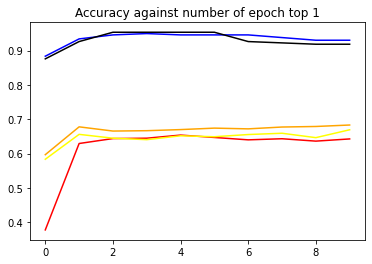

In [12]:
import matplotlib.pyplot as plt

plt.title("Accuracy against number of epoch top 1")
plt.plot([i for i in range(EPOCH_NUM)], mean_accuracies , label='test 1', color='red')
plt.plot([i for i in range(EPOCH_NUM)], topk_accuracies , label='test 1', color='orange')
plt.plot([i for i in range(EPOCH_NUM)], min_accuracies , label='test 1', color='yellow')
plt.plot([i for i in range(EPOCH_NUM)], final_mean_accuracies , label='test 1', color='blue')
plt.plot([i for i in range(EPOCH_NUM)], final_min_accuracies , label='test 1', color='black')